<a href="https://colab.research.google.com/github/Octa-p/Multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [21]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas
from matplotlib import pyplot as plt

In [5]:
Name = 'รติมา ชินวงษ์'
ID = '6230200420'

In [6]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [7]:
Data = DataGenerator(Name,ID)

020:30:13


In [8]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-1.122979,-3.295591,-1.905968,8.807450,3.436086,-7.863223,7.261924,-2.483273,5.677271,-1.384419,-5.713879,-0.701148,-4.897625,-6.022824,-4.822365,2.341001,-1.972514,9.505130,2.176511,-7.749094,7.020367,-4.584958,-8.326107,-4.272719,4.336434,-5.695388,-2.706593,8.540504,10.424226,2.216951,-6.591182,13.084756
1,-1.178806,-1.705041,-2.304133,8.370834,5.129572,-7.872284,4.108793,-2.045335,6.425141,-2.940128,-7.962174,0.004099,-6.024449,-7.155523,-3.888844,1.612577,-0.771112,8.855043,2.296529,-8.149986,5.307715,-5.962821,-7.641550,-3.307962,3.394114,-4.219148,-2.052904,10.047594,10.208270,4.121820,-3.410083,22.609099
2,0.904578,4.691859,-3.682533,-2.953914,5.427658,-7.973544,-6.298981,-5.837808,-6.806116,4.240747,-6.726297,-2.661466,2.331365,-2.299572,-3.537591,2.937966,7.014755,-2.094251,-7.833492,7.046922,6.967556,-3.341271,3.557202,-1.224863,4.301185,-6.613338,-8.054432,8.960152,8.176317,-4.350617,9.383718,-19.753085
3,-8.309558,-0.700731,-6.674782,6.733736,8.064153,-9.515225,9.423268,10.051663,5.773942,2.191188,-6.168410,-3.242995,7.661962,-3.454031,-6.803181,-4.604935,0.994939,-9.752362,6.206699,-7.746425,-2.671065,-8.756579,3.640509,-3.570759,5.755518,3.337119,-2.788030,-9.860391,8.703038,3.645643,-1.401462,20.228213
4,8.340888,-8.214758,-5.512123,-1.567990,5.905051,8.980198,8.079326,3.190559,-0.398816,-1.669538,5.329574,3.758042,2.629444,-2.314456,6.568466,6.071499,-5.243972,3.210821,6.460610,-11.300239,-9.199506,9.716673,6.044433,4.530647,6.792402,-5.300715,-8.420804,5.595060,0.070567,6.126067,-16.429515,32.630334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.621194,3.082826,-6.051600,-9.254466,5.131143,0.667478,-1.629920,-1.360385,-1.946909,-4.092077,2.009247,1.749112,-3.929099,-1.599213,-3.747115,1.836762,-7.503489,3.989790,5.298064,-6.293570,5.447109,-3.485855,3.683923,5.746130,5.880837,2.346970,2.474427,0.988740,-2.332277,0.787062,6.165651,5.935309
9996,-0.565152,4.502084,-4.958137,-1.130835,6.393298,-10.045349,-5.483434,-6.521711,-3.976157,2.130145,-7.738335,-2.840233,1.204603,-4.691612,-2.654711,1.921697,7.099371,-0.297220,-10.052557,7.396492,6.868344,-2.660437,2.540235,-0.749447,4.566415,-7.151448,-8.291589,8.715938,5.509624,-7.029211,9.004169,-33.146053
9997,5.458936,6.669342,-9.677379,-4.951354,5.975153,0.109411,9.595156,0.086257,6.671417,-0.332043,7.129822,-5.413321,-0.944951,-0.779493,-1.810268,6.062982,-3.143105,-2.785437,-1.798621,-2.375633,2.291665,-6.591749,4.390090,-3.670793,11.363186,-6.152867,4.829156,-1.963335,-7.680129,4.356970,13.338685,23.784849
9998,5.167506,9.960286,5.908806,-5.992349,-6.306272,-2.778985,11.405055,1.561802,7.698767,-9.825561,5.709468,-9.183920,-9.588192,-11.000842,-5.495952,-3.846113,9.210216,7.947077,0.979926,6.075725,-9.279143,4.291894,-9.643116,-6.771529,8.741895,-2.417855,6.372045,1.503416,3.849181,4.402622,19.920572,24.013108


## **2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ**

- ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [10]:
Data.shape  #1000 ตัว 32 Dimensions

(10000, 32)

จากการตรวจสอบข้อมูล ซึ่งข้อมูลที่ให้มามีจำนวน Dimensions มากเกินไป เราจึงควรตรวจสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

ซึ่ง ณ ตอนนี้ข้อมูลเป็นตัวเลขทุก dimension อยู่แล้ว จึงไม่ต้องลบ column ที่ไม่เป็นตัวเลขออก

- ตรวจสอบว่า ระหว่าง columns มี correlation กันมากน้อยแค่ไหน ด้วย numpy

In [11]:
import numpy as np

In [13]:
corr = np.corrcoef(Data.to_numpy().T)

In [14]:
corr.shape

(32, 32)

In [15]:
corr

array([[ 1.        ,  0.11158179,  0.0475386 , ...,  0.13355265,
         0.11158179,  0.13355265],
       [ 0.11158179,  1.        ,  0.28012196, ...,  0.00354079,
         1.        ,  0.00354079],
       [ 0.0475386 ,  0.28012196,  1.        , ..., -0.05306425,
         0.28012196, -0.05306425],
       ...,
       [ 0.13355265,  0.00354079, -0.05306425, ...,  1.        ,
         0.00354079,  1.        ],
       [ 0.11158179,  1.        ,  0.28012196, ...,  0.00354079,
         1.        ,  0.00354079],
       [ 0.13355265,  0.00354079, -0.05306425, ...,  1.        ,
         0.00354079,  1.        ]])

In [16]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 1 column = 30 corrcoef = 1.0
row = 29 column = 31 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0
row = 31 column = 29 corrcoef = 1.0


มีข้อมูลที่ซ้ำกัน จึงต้องเลือกข้อมูล

In [24]:
Data.iloc[1:32,:32]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
1,-1.178806,-1.705041,-2.304133,8.370834,5.129572,-7.872284,4.108793,-2.045335,6.425141,-2.940128,-7.962174,0.004099,-6.024449,-7.155523,-3.888844,1.612577,-0.771112,8.855043,2.296529,-8.149986,5.307715,-5.962821,-7.641550,-3.307962,3.394114,-4.219148,-2.052904,10.047594,10.208270,4.121820,-3.410083,22.609099
2,0.904578,4.691859,-3.682533,-2.953914,5.427658,-7.973544,-6.298981,-5.837808,-6.806116,4.240747,-6.726297,-2.661466,2.331365,-2.299572,-3.537591,2.937966,7.014755,-2.094251,-7.833492,7.046922,6.967556,-3.341271,3.557202,-1.224863,4.301185,-6.613338,-8.054432,8.960152,8.176317,-4.350617,9.383718,-19.753085
3,-8.309558,-0.700731,-6.674782,6.733736,8.064153,-9.515225,9.423268,10.051663,5.773942,2.191188,-6.168410,-3.242995,7.661962,-3.454031,-6.803181,-4.604935,0.994939,-9.752362,6.206699,-7.746425,-2.671065,-8.756579,3.640509,-3.570759,5.755518,3.337119,-2.788030,-9.860391,8.703038,3.645643,-1.401462,20.228213
4,8.340888,-8.214758,-5.512123,-1.567990,5.905051,8.980198,8.079326,3.190559,-0.398816,-1.669538,5.329574,3.758042,2.629444,-2.314456,6.568466,6.071499,-5.243972,3.210821,6.460610,-11.300239,-9.199506,9.716673,6.044433,4.530647,6.792402,-5.300715,-8.420804,5.595060,0.070567,6.126067,-16.429515,32.630334
5,-0.008196,-3.905819,-2.637004,11.584560,3.609969,-4.922349,4.130803,-0.354242,5.428811,-1.945650,-4.310180,-0.241423,-6.209236,-6.010673,-4.444782,0.892926,-0.181288,8.701273,4.289904,-6.810533,6.110376,-5.082506,-8.846683,-2.556855,3.647087,-5.247500,-4.014248,8.827011,10.689298,3.435147,-7.811637,19.175733
6,-1.451118,-3.321407,-2.468177,9.508984,5.016766,-6.770164,4.504332,-2.038038,6.095116,-0.102597,-3.310334,0.996609,-5.974946,-6.391871,-1.672765,0.671353,-1.996846,10.266452,1.928209,-6.279352,5.981063,-4.801057,-10.811158,-2.119801,1.681898,-4.812102,-2.681608,10.315724,10.353871,4.297260,-6.642815,23.486299
7,0.671690,-3.830463,-0.928794,2.866057,2.734904,8.027056,3.700261,0.083224,-6.226578,1.571061,-2.371665,-4.958551,2.637631,5.244587,2.638098,3.244530,3.351471,10.712978,6.363050,5.405759,-2.681341,-5.938889,9.305665,-0.477574,-1.606843,2.578406,4.564302,5.876039,-1.284383,7.904193,-7.660926,41.520964
8,5.277115,8.073927,5.872592,-6.940423,-4.473827,-4.723098,7.874479,1.942789,7.342161,-8.149539,5.774390,-9.927808,-10.244034,-11.283071,-4.226304,-2.097110,9.967098,9.084981,-0.842068,4.887911,-10.149832,5.400242,-8.597745,-6.325101,8.145970,-3.728967,7.788023,1.827706,4.067961,2.673430,16.147854,15.367151
9,1.025774,-2.732722,-5.124041,10.234182,0.261584,3.921261,-5.994564,4.755783,4.560511,5.574445,7.317284,5.869593,-2.121829,6.747645,-9.036736,7.351578,5.730886,1.557586,2.191701,9.230923,-0.864130,0.881085,-0.224412,4.042582,-10.335821,-8.488596,-7.493380,7.581814,-2.737221,1.767736,-5.465443,10.838681
10,2.499005,7.459226,8.574196,5.299181,-8.088780,3.006087,-2.051506,-0.577025,3.101352,-5.904296,-5.777974,4.317075,6.775549,8.298687,4.269511,-10.728141,-8.217539,2.849536,-5.012835,-4.141735,8.697145,8.469036,2.105065,-4.659973,5.662846,-2.170012,2.243283,7.616415,-1.924925,0.299982,14.918453,3.499909


ทำการ clustering โดยวิธี K-means

 K-means คือการแบ่งกลุ่ม แบบ Clustering ซึ่งการแบ่งกลุ่มในลักษณะนี้จะใช้พื้นฐานทางสถิติ ซึ่งแน่นอนว่าต้องมีตัวเลขประกอบ อย่างน้อย 2 ตัวแปรขึ้นไป

### K-mean

Import

In [25]:
from sklearn.cluster import KMeans

Define

In [26]:
kmeans = KMeans(n_clusters=3, random_state=2021) #ไม่รู้ว่ามีกี่กลุ้มแต่ลองสมมติให้จำแนกข้อมูลเป็น 3 กลุ่ม

Fit - Transform

คำนวณหาจุด cluter centers ของข้อมูล example_df_drop ด้วยวิธี K-means clustering

In [27]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

แสดง จุด cluster centers ที่คำนวณออกมาได้

In [28]:
kmeans.cluster_centers_

array([[ 2.36312112e+00, -3.57334831e+00, -2.98576187e-01,
         4.44720149e+00, -1.62739872e+00,  6.09856381e+00,
         4.73017951e+00, -1.94983759e+00, -2.98145262e+00,
        -2.12826486e+00,  2.53710462e+00, -4.61318995e-01,
         1.50048996e+00,  2.82098171e+00,  5.95444794e+00,
         1.82802363e+00, -3.28184200e-01,  3.14333971e+00,
         5.08958206e+00, -4.48039417e-01,  5.18546986e-01,
         2.01307568e+00,  3.90618986e+00,  1.44977948e+00,
         6.12219763e+00,  2.78653425e-01, -1.09583798e+00,
         9.26455179e-01, -9.93665092e-01,  7.11081508e+00,
        -7.14669663e+00,  3.75540754e+01],
       [ 1.26325758e+00,  2.69438228e+00, -2.17233773e+00,
         1.50249405e+00,  1.32928978e+00, -1.65430771e+00,
         2.68054221e+00,  2.11375769e+00,  3.97754902e+00,
        -2.25748407e+00,  7.01694096e-01, -3.97764877e-01,
        -1.34572953e+00, -1.13655333e+00, -3.91278994e+00,
        -4.38672748e-01, -7.96311024e-02,  1.73583594e+00,
         1.49

ทดสอบการจัดกลุ่มของ Data

In [29]:
y = kmeans.predict(Data)
y

array([1, 1, 2, ..., 1, 1, 0], dtype=int32)

ทำ PCA ข้อมูล Data แล้ว วาดกราฟ scatter plot โดยใส่สีตามผลการทำ kmeans clustering แล้วนำมาเทียบกับ กราฟ PCA - scatter ของข้อมูลจริง

In [30]:
from sklearn.decomposition import PCA #import

pca = PCA(n_components=2) #define

new_pca = pca.fit_transform(Data) #fit-transform

In [31]:
new_pca.shape

(10000, 2)

In [32]:
new_pca

array([[  1.76494662,  -1.4466905 ],
       [ -6.98031497,   0.99667487],
       [ 37.88030012,  11.03028462],
       ...,
       [-11.14853928,  15.29958258],
       [-11.32773815,  29.4151275 ],
       [-19.36078603,  -5.08943316]])

ของจริง

In [33]:
from matplotlib import pyplot as plt

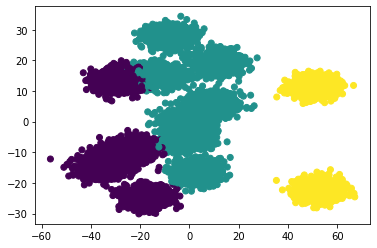

In [37]:
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

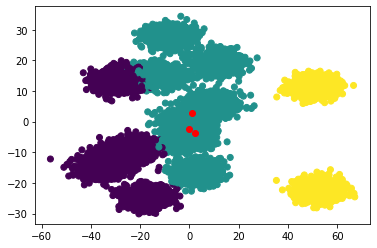

In [38]:
plt.scatter(new_pca[:,0],new_pca[:,1],c=y) #ค่ากลางของ cluster
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'or')

ทำการหาค่า k ที่เหมาะสม โดยการใช้ Elbow Method 

SSE

คือระยะห่างจากจุดศูนย์กลาง

In [39]:
kmeans.inertia_ ## Sum of Squared Errors

10129784.269352978

In [42]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [43]:
SSE

[17376235.56078428,
 12379473.796194354,
 10129784.269352978,
 8730523.544304458,
 7615456.759086133,
 6520299.778351892,
 5320747.510562791,
 4223015.069657261]

Text(0, 0.5, 'SSE')

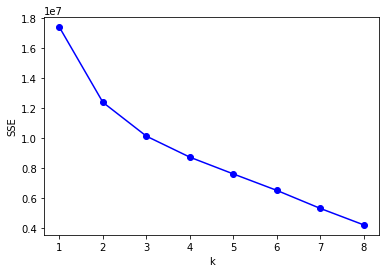

In [44]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b') #กราฟแสดงจำนวน K ที่เหมาะสม
plt.xlabel('k')
plt.ylabel('SSE')
#จุดที่หัก คือจุดที่ 2

Silhouette coefficient (หาค่า K)

How close the data point is to other points in the cluster (จุดในกลุ่มของตัวมันเองใกล้กันแค่ไหน)

How far away the data point is from points in other clusters (จุดของแต่ละกลุ่มที่ไม่ได้อยู่กลุ่มเดียวกันไกลกันแค่ไหน)

In [45]:
from sklearn import metrics

In [46]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

Text(0, 0.5, 'Silhouette Score')

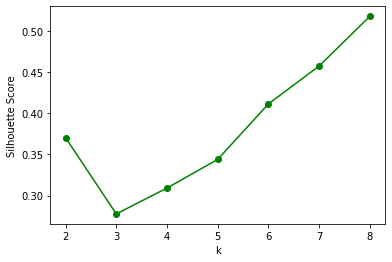

In [47]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouette Score') #ดีที่สุดคือ 8 เพราะมีค่าสูงสุด

3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

ลด Dimension โดยวิธี MDS ใช้ plot กราฟ เพื่อวิเคราะห์ข้อมูลที่ไม่ทราบถึงตัวแปรหรือมิติที่สำคัญ

In [48]:
from sklearn.manifold import MDS

In [49]:
mds = MDS(n_components=2) #dimension = 2

In [50]:
new_mds = mds.fit_transform(Data)

In [52]:
kmeans_2 = KMeans(n_clusters=8,random_state=2021)  #ให้ k= 8   
kmeans_2.fit(Data)
g = kmeans_2.predict(Data)

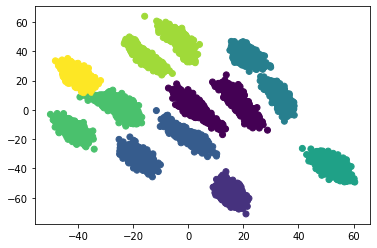

In [55]:
kmeans= KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_mds[:,0],new_mds[:,1],c=y)

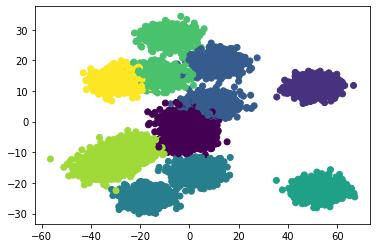

In [56]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)

plt.scatter(new_pca[:,0],new_pca[:,1],c=y)